In [97]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import GPy
import matplotlib.pyplot as plt
%matplotlib inline

Теперь посмотрим на двухразмерные ковариационные функции.

In [98]:
function_names = ['beale', 'michalewicz', 'ackley1', 'gsobol', 'michalewicz5', 'sqmichalewicz5', 'bohachevsky']

In [99]:
def functionDoESpecial(X, functionName):
    x = np.array(X, copy=True)

    sqr = lambda x: x**2

    if functionName.lower() == 'beale':
        functionName = 'beale'
        inputDimension = 2

        x = 2 * x - 1

        y = -(-(sqr(-1.5 + x[:, 0] * (1 - x[:, 1])) + sqr(-2.25 + (1 - sqr(x[:, 1])) * x[:, 0]) + \
              sqr(-2.625 + (1 - x[:, 1]**3 * x[:, 0]))))


    elif functionName.lower() ==  'rosenbrock':
        functionName = 'rosenbrock'

        c = 2.048
        x = c * (2 * x - 1)
        y = np.sum((1 - x[:, :-1])**2 + \
                   100 * (x[:, 1:] - x[:, :-1]**2)**2, axis=1)


    elif functionName.lower() == 'michalewicz':
        functionName = 'michalewicz';

        # rescale to 0<x<np.pi
        x = np.pi * x
        numberDimensions = x.shape[1]

        y = 0
        for i in range(numberDimensions):
            y = y + np.sin(x[:, i]) * np.sin(x[:, i]**2 / np.pi)


    elif functionName.lower() == 'ackley1':
        functionName = 'ackley1'

        x = 32.768 * (2 * x - 1)
        numberDimensions = x.shape[1]
        n = numberDimensions
        a = 20
        b = 0.2
        c = 2 * np.pi
        s1 = 0
        s2 = 0
        for i in range(numberDimensions):
            s1 = s1 + x[:, i]**2
            s2 = s2 + np.cos(c * x[:, i])

        y = -a * np.exp(-b * np.sqrt(1.0 / n * s1)) + a + np.exp(1)

    elif functionName.lower() == 'gsobol':
        functionName = 'gSobol'

        # x in [0,1]
        numberDimensions = x.shape[1]
        a = [4.5, 4.5, 1, 0, 1, 9, 0,9]
        y = 1
        for i in range(numberDimensions):
            y = y * (np.abs(4 * x[:, i] - 2) + a[i]) / (1 + a[i])



    elif functionName.lower() == 'michalewicz5':
        functionName = 'michalewicz5'

        # rescale to 0<x<np.pi
        x = np.pi * x
        numberDimensions = x.shape[1]

        y = 0
        for i in range(numberDimensions):
            y = y + np.sin(x[:, i]) * np.sin(x[:, i]**2 / np.pi)

    elif functionName.lower() == 'sqmichalewicz5':
        functionName = 'sqMichalewicz5'

        # rescale to 0<x<np.pi
        x = np.pi * x
        numberDimensions = x.shape[1]

        y = 0
        for i in range(numberDimensions):
            y = y + np.sin(x[:, i]) * np.sin(x[:, i]**2 / np.pi)**2

    elif functionName.lower() == 'rosenbrock5':
        functionName = 'rosenbrock5'

        c = 2.048
        x = c * (2 * x - 1)
        y = np.sum((1 - x[:, :-1])**2 + \
                   100 * (x[:, 1:] - x[:, :-1]**2)**2, axis=1)
        
    elif functionName.lower() == 'bohachevsky':
        functionName='bohachevsky'
        ndim = 2
        y =- 0.4*np.cos(4*np.pi*x[:, 1])
        
    elif functionName.lower() == 'goldstein':
        bounds = np.array([[-2, 2.], [-2, 2]])
        xopt = np.array([0, -1.])
        ndim = 2

        a = (1 + (x[:, 0] + x[:, 1]+1)**2 *
                 (19-14*x[:, 0] +
                  3*x[:, 0]**2 - 14*x[:, 1] + 6*x[:, 0]*x[:, 1] + 3*x[:, 1]**2))
        b = (30 +
                 (2*x[:, 0] - 3*x[:, 1])**2 *
                 (18 - 32*x[:, 0] + 12*x[:, 0]**2 + 48*x[:, 1] - 36*x[:, 0]*x[:, 1]
                  + 27*x[:, 1]**2))
        y=-a*b

    elif functionName.lower() == 'branin':
        y = (x[:, 1]-(5.1/(4*np.pi**2))*x[:, 0]**2+5*x[:, 0]/np.pi-6)**2
        y += 10*(1-1/(8*np.pi))*np.cos(x[:, 0])+10
        y /= 10.
    
    elif functionName.lower() == 'sinusoidal':
        functionName = 'sinusoidal'

        y=np.ravel(np.cos(x[:,0]) + np.sin(3*x[:,0]))
        
    elif functionName.lower() == 'gramacy':
        functionName = 'gramacy'
        y=np.ravel(np.sin(10*np.pi*x) / (2*x) + (x-1)**4)

    return y

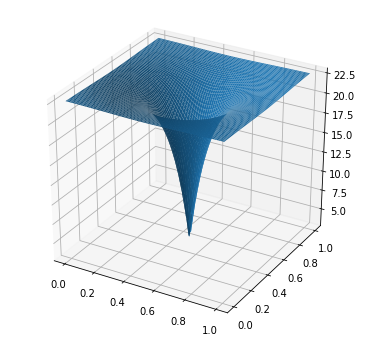

In [100]:
f_name = 'ackley1'
xs = np.linspace(0, 1, 300)
ys = np.linspace(0, 1, 300)

objective = lambda x: functionDoESpecial(x, f_name)
xs, ys = np.meshgrid(xs, ys)
values = objective(np.dstack([xs, ys]).reshape(90000, 2)).reshape(300, 300)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(xs, ys, values, rstride=4, cstride=4, linewidth=0)

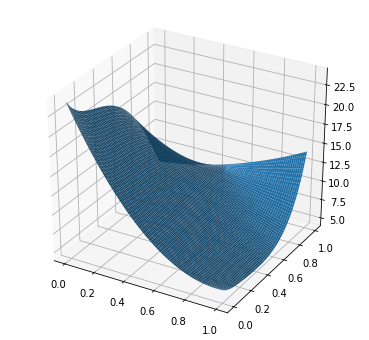

In [101]:
f_name = 'beale'
xs = np.linspace(0, 1, 300)
ys = np.linspace(0, 1, 300)

objective = lambda x: functionDoESpecial(x, f_name)
xs, ys = np.meshgrid(xs, ys)
values = objective(np.dstack([xs, ys]).reshape(90000, 2)).reshape(300, 300)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(xs, ys, values, rstride=4, cstride=4, linewidth=0)

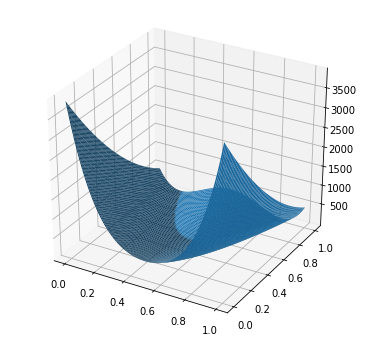

In [102]:
f_name = 'rosenbrock'
xs = np.linspace(0, 1, 300)
ys = np.linspace(0, 1, 300)

objective = lambda x: functionDoESpecial(x, f_name)
xs, ys = np.meshgrid(xs, ys)
values = objective(np.dstack([xs, ys]).reshape(90000, 2)).reshape(300, 300)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(xs, ys, values, rstride=4, cstride=4, linewidth=0)

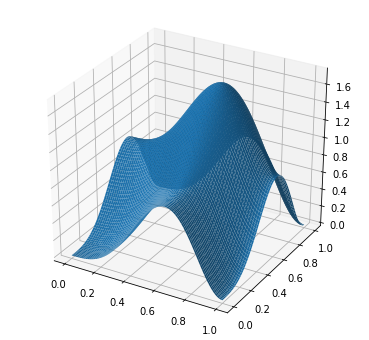

In [103]:
f_name = 'michalewicz'
xs = np.linspace(0, 1, 300)
ys = np.linspace(0, 1, 300)

objective = lambda x: functionDoESpecial(x, f_name)
xs, ys = np.meshgrid(xs, ys)
values = objective(np.dstack([xs, ys]).reshape(90000, 2)).reshape(300, 300)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(xs, ys, values, rstride=4, cstride=4, linewidth=0)

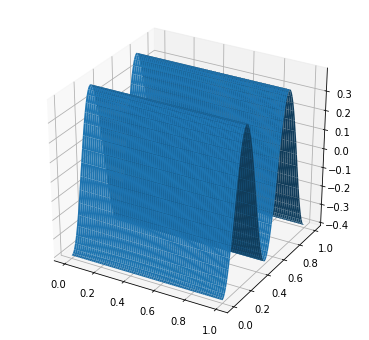

In [104]:
f_name = 'bohachevsky'
xs = np.linspace(0, 1, 300)
ys = np.linspace(0, 1, 300)

objective = lambda x: functionDoESpecial(x, f_name)
xs, ys = np.meshgrid(xs, ys)
values = objective(np.dstack([xs, ys]).reshape(90000, 2)).reshape(300, 300)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(xs, ys, values, rstride=4, cstride=4, linewidth=0)

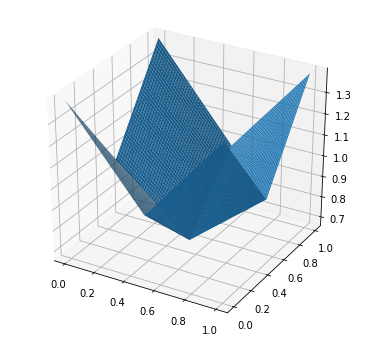

In [105]:
f_name = 'gsobol'
xs = np.linspace(0, 1, 300)
ys = np.linspace(0, 1, 300)

objective = lambda x: functionDoESpecial(x, f_name)
xs, ys = np.meshgrid(xs, ys)
values = objective(np.dstack([xs, ys]).reshape(90000, 2)).reshape(300, 300)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(xs, ys, values, rstride=4, cstride=4, linewidth=0)

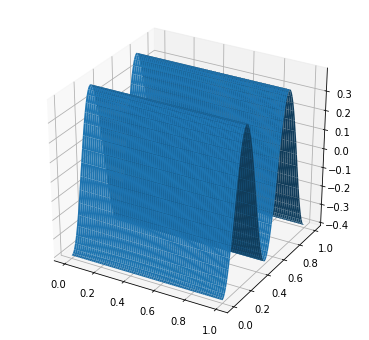

In [106]:
f_name = 'bohachevsky'
xs = np.linspace(0, 1, 300)
ys = np.linspace(0, 1, 300)

objective = lambda x: functionDoESpecial(x, f_name)
xs, ys = np.meshgrid(xs, ys)
values = objective(np.dstack([xs, ys]).reshape(90000, 2)).reshape(300, 300)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(xs, ys, values, rstride=4, cstride=4, linewidth=0)

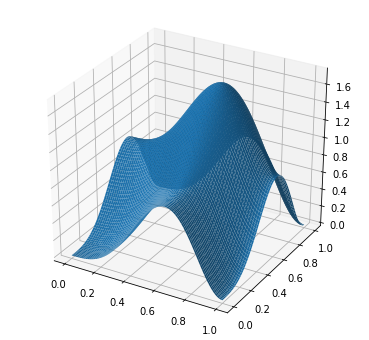

In [107]:
f_name = 'michalewicz5'
xs = np.linspace(0, 1, 300)
ys = np.linspace(0, 1, 300)

objective = lambda x: functionDoESpecial(x, f_name)
xs, ys = np.meshgrid(xs, ys)
values = objective(np.dstack([xs, ys]).reshape(90000, 2)).reshape(300, 300)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(xs, ys, values, rstride=4, cstride=4, linewidth=0)

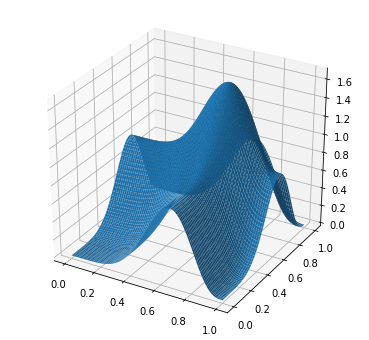

In [108]:
f_name = 'sqmichalewicz5'
xs = np.linspace(0, 1, 300)
ys = np.linspace(0, 1, 300)

objective = lambda x: functionDoESpecial(x, f_name)
xs, ys = np.meshgrid(xs, ys)
values = objective(np.dstack([xs, ys]).reshape(90000, 2)).reshape(300, 300)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(xs, ys, values, rstride=4, cstride=4, linewidth=0)

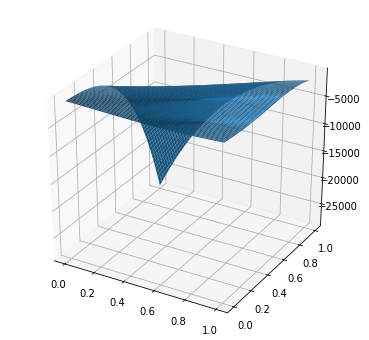

In [109]:
f_name = 'goldstein'
xs = np.linspace(0, 1, 300)
ys = np.linspace(0, 1, 300)

objective = lambda x: functionDoESpecial(x, f_name)
xs, ys = np.meshgrid(xs, ys)
values = objective(np.dstack([xs, ys]).reshape(90000, 2)).reshape(300, 300)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(xs, ys, values, rstride=4, cstride=4, linewidth=0)

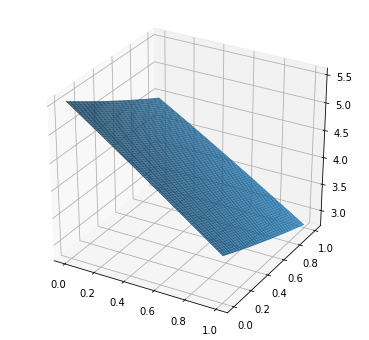

In [110]:
f_name = 'branin'
xs = np.linspace(0, 1, 300)
ys = np.linspace(0, 1, 300)

objective = lambda x: functionDoESpecial(x, f_name)
xs, ys = np.meshgrid(xs, ys)
values = objective(np.dstack([xs, ys]).reshape(90000, 2)).reshape(300, 300)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(xs, ys, values, rstride=4, cstride=4, linewidth=0)

 C:\Users\moroz\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'dataplot': [<matplotlib.collections.PathCollection at 0x1eb11ae97f0>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x1eb11ae92b0>]}

 C:\Users\moroz\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


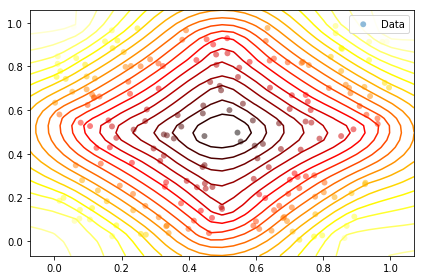

In [111]:
f_name = 'gsobol'
a = np.random.uniform (0,1,(1,2))
b = functionDoESpecial (a, f_name)
for i in range (200):
    X = np.random.uniform (0,1,(1,2))
    y = functionDoESpecial (X, f_name)
    a=np.append (a,X, axis=0)
    b=np.append (b,y)
    
gp_x = a.reshape(a.shape[0], 2)
gp_y = b.reshape(b.shape[0], 1)
kern_1 = GPy.kern.Exponential(2)
model = GPy.models.GPRegression(gp_x, gp_y, kern_1)
model.optimize()
model.plot()

In [112]:
kern_name = [GPy.kern.Exponential, GPy.kern.Matern32, GPy.kern.Matern52] #ядра гауссовских процессов

def test (f_name, k1, i1, m1, ker_name):
#k1 - количество тестов
#i1 - количество точек в обучающей выборке
#m1 - количество точек для подсчёта MAE, MSE
    MAE_exp = []
    MSE_exp = []
    for k in range (k1):
        a = np.random.uniform (0,1,(1,2))
        b = functionDoESpecial (a, f_name)
        for i in range (i1-1):
            X = np.random.uniform (0,1,(1,2))
            y = functionDoESpecial (X, f_name)
            a=np.append (a,X, axis=0)
            b=np.append (b,y)
        kern_1 = ker_name(2)
        gp_x = a.reshape(a.shape[0], 2)
        gp_y = b.reshape(b.shape[0], 1)
        model = GPy.models.GPRegression(gp_x, gp_y, kern_1)
        model.optimize()
        a = np.random.uniform (0,1,(1,2))
        b = functionDoESpecial (a, f_name)
        for i in range (m1-1):
            X = np.random.uniform (0,1,(1,2))
            y = functionDoESpecial (X, f_name)
            a=np.append (a,X, axis=0)
            b=np.append (b,y)

        gp_xx = a.reshape(a.shape[0], 2)
        gp_yy=model.predict(gp_xx)
        c=gp_yy[0]
        MAE_exp=np.append(MAE_exp, MAE(b,c))
        MSE_exp=np.append(MSE_exp, MSE(b,c))
    return MAE_exp, MSE_exp

In [113]:
d1 = pd.DataFrame(columns=['Name','MSE_exp', 'MSE_mt32', 'MSE_mt52'])
d2 = pd.DataFrame(columns=['Name','MAE_exp', 'MAE_mt32', 'MAE_mt52'])

i=0
for k in range (5):
    for f_name in function_names:
        MSE_error=[f_name+str(k)]
        MAE_error=[f_name+str(k)]
        for ker_name in kern_name:
            text = test (f_name, 50, 30+k*5,100, ker_name)
            MAE_1 = text[0]
            MSE_1 = text[1]
            MAE_=round(np.mean (MAE_1),6)
            MSE_=round(np.mean (MSE_1),6)
            MSE_error = np.append (MSE_error,MSE_)
            MAE_error = np.append (MAE_error,MAE_)
        d1.loc[i] = MSE_error
        d2.loc[i] = MAE_error
        i=i+1

 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:551: RuntimeWarning:overflow encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:551: RuntimeWarning:overflow encountered in square
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:551: RuntimeWarning:invalid value encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:overflow encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:invalid value encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in tru

 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:551: RuntimeWarning:overflow encountered in square
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:551: RuntimeWarning:invalid value encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:551: RuntimeWarning:overflow encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:551: RuntimeWarning:overflow encountered in square
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:551: RuntimeWarning:invalid value encountered in multiply


In [114]:
function_names = ['michalewicz', 'ackley1', 'gsobol', 'michalewicz5', 'sqmichalewicz5', 'Gramacy']
def test (f_name, k1, i1, m1, ker_name):
#k1 - количество тестов
#i1 - количество точек в обучающей выборке
#m1 - количество точек для подсчёта MAE, MSE
    MAE_exp = []
    MSE_exp = []
    for k in range (k1):
        a=[]
        b=[]
        for i in range (i1):
            X = np.random.uniform (0,1,(1,1))
            y = functionDoESpecial (X, f_name)
            a=np.append (a,X)
            b=np.append (b,y)

        gp_x = a.reshape(a.shape[0], 1)
        gp_y = b.reshape(b.shape[0], 1)
        kern_1 = ker_name(1)
        model = GPy.models.GPRegression(gp_x, gp_y, kern_1)
        model.optimize()
        a=[]
        b=[]
        for i in range (m1):
            X = np.random.uniform (0,1,(1,1))
            y = functionDoESpecial (X, f_name)
            a=np.append (a,[X])
            b=np.append (b,y)

        gp_xx = a.reshape(a.shape[0], 1)
        gp_yy=model.predict(gp_xx)
        c=gp_yy[0]
        MAE_exp=np.append(MAE_exp, MAE(b,c))
        MSE_exp=np.append(MSE_exp, MSE(b,c))
    return MAE_exp, MSE_exp

In [115]:
i=35
for k in range (5):
    for f_name in function_names:
        MSE_error=[f_name+str(k)]
        MAE_error=[f_name+str(k)]
        for ker_name in kern_name:
            text = test (f_name, 50 , 30+k*5,100, ker_name)
            MAE_1 = text[0]
            MSE_1 = text[1]
            MAE_=round(np.mean (MAE_1),6)
            MSE_=round(np.mean (MSE_1),6)
            MSE_error = np.append (MSE_error,MSE_)
            MAE_error = np.append (MAE_error,MAE_)
        d1.loc[i] = MSE_error
        d2.loc[i] = MAE_error
        i=i+1

 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:overflow encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:invalid value encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:551: RuntimeWarning:overflow encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:551: RuntimeWarning:overflow encountered in square
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:551: RuntimeWarning:invalid value encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:551: RuntimeWarning:overflow encountered in square
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:551: RuntimeWarning:invalid value encountered in multiply
 C:\Users\moroz\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:551: RuntimeWarning:overflow encountered in multip

In [116]:
print (d1)

               Name   MSE_exp   MSE_mt32   MSE_mt52
0            beale0  0.776595   0.194863   0.071974
1      michalewicz0  0.020735   0.007758   0.003305
2          ackley10  1.325365   5.392114   5.455054
3           gsobol0  0.002127   0.000905   0.001338
4     michalewicz50  0.019857   0.005848   0.003557
5   sqmichalewicz50  0.025756   0.012213   0.008203
6      bohachevsky0  0.047378   0.071677   0.068474
7            beale1  0.543993   0.194372   0.037857
8      michalewicz1  0.014164    0.00504   0.002771
9          ackley11  1.006594    5.69682   5.187889
10          gsobol1  0.001644   0.000571   0.000783
11    michalewicz51  0.013841   0.003331   0.002522
12  sqmichalewicz51  0.020926   0.010343   0.006069
13     bohachevsky1  0.041195   0.059709   0.072399
14           beale2  0.536317   0.092943   0.028315
15     michalewicz2  0.011189   0.002843   0.002678
16         ackley12   0.81861   5.175269   5.284073
17          gsobol2   0.00145   0.000424   0.000471
18    michal

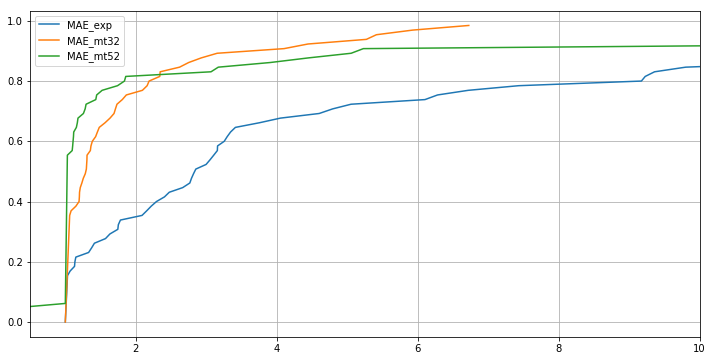

In [119]:
import pylab
plt.figure(figsize=(12, 6))
Names = ['MAE_exp', 'MAE_mt32', 'MAE_mt52']
k=65
for name in Names:
    x=[]
    for i in range(k):
        x=np.append(x,float(d2[name][i]) / float(d2.iloc[i].min()))
    y=[]
    x=sorted(x)
    for ab in x:
        m=0
        for i in range(k):
            if (float(d2[name][i]) / float(d2.iloc[i].min())) < ab:
                m=m+1
        y=np.append (y,m)
    y=y/k
    plt.plot (x,y, label = name)
    plt.legend()
    print ('')
plt.xlim(0.5,10)
plt.grid()
pylab.savefig('foo.png')

In [96]:
d2.head(70)

,Name,MAE_exp,MAE_mt32,MAE_mt52
0,beale0,0.408443,0.179919,0.089156
1,michalewicz0,0.09224,0.040257,0.032087
2,ackley10,0.432586,1.46101,1.430443
3,gsobol0,0.028973,0.018142,0.018091
4,michalewicz50,0.090762,0.041391,0.031284
5,sqmichalewicz50,0.107514,0.067194,0.057422
6,bohachevsky0,0.177339,0.22578,0.229995
7,beale1,0.366463,0.132758,0.073346
8,michalewicz1,0.076375,0.032606,0.024695
9,ackley11,0.405907,1.512519,1.434938
